In [1]:
import pandas as pd                     
import matplotlib.pyplot as plt      
import numpy as np        
import pandas
import matplotlib as plt
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import csv
from datetime import date, timedelta
from collections import defaultdict

In [2]:
import os
import glob

In [3]:
#Combining NorthernCalifornia csvs together
path = "../../Raw_Data/NorthernCalifornia" # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

northerncalifornia_df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
#Creating a function to clean datasets
def cleandata(data):
    data.dropna(inplace=True)
    groupdata = data.groupby([data.DATE]).mean()
    groupdata.reset_index(inplace=True)
    #groupdata[['Year', 'Month']] = groupdata['DATE'].str.split('-', 1, expand=True)
    new_df = groupdata[["DATE","TAVG"]]
    #result_df = new_df.pivot(index= 'Year', columns='Month', values=['TAVG'])
    return new_df

In [5]:
norcal_data = cleandata(northerncalifornia_df)


#norcal_data.columns = norcal_data.columns.droplevel(0)

#norcal_data = norcal_data.rename_axis(None, axis=1)
norcal_data

,DATE,TAVG
0,2000-01,9.610000
1,2000-02,10.909091
2,2000-03,12.580000
3,2000-04,15.110000
4,2000-05,17.833333
...,...,...
238,2019-11,13.556140
239,2019-12,10.191228
240,2020-01,9.612281
241,2020-02,12.271429


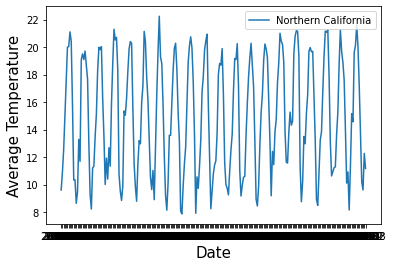

In [6]:
x = norcal_data.DATE
y = norcal_data.TAVG
fig = plt.figure()
plt.plot(x, y, label='Northern California')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Temperature', fontsize=15)
plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]
plt.legend()
plt.show()

In [ ]:
fig.savefig('NorthernCalifornia.png')